 # Report


# Function 

In [1]:
import baseline_model as model
from dataloader import Dataloader
from evaluation import Evaluator
import os
from matplotlib import pyplot as plt
import pandas as pd

dl_config_path = os.path.join('config', 'config.yml')
api_config_path = os.path.join('config', 'api_config.yml')
eval_config_path = os.path.join('config', 'evaluation_config.yml')

param_api_id = "yf24xCq95gJkorzBWb16GAP4eOxQNVZR"
param_api_secret = "sWkUzN3a8uC8QDu1V64bH3bAtCdduf74Xh8JnT_OrYZf_x2ObWdiNkOga59cB2C5Q9us9tW0bg4zFg4BfeOR7mRzui3ROZ1QHI0i"

In [5]:
# Main function calling everything
def f(date_from, date_to, api_id, api_secret):
    # Load Data
    dataloader = Dataloader(dl_config_path, '2018-12-25', date_to, api_id, api_secret)
    dataframe = dataloader.load()

    # Preprocess Data
    dataframe.fillna(0.0, inplace=True)

    # Pass entire Dataframe to model (which might not use all cols/rows)
    market_strategy = model.predict(date_from, date_to, dataframe)

    # Evaluate strategy passing the same Dataframe to the evaluator
    evaluator = Evaluator(
        start= date_from,
        end = date_to, 
        evalution_config_path=eval_config_path,
        dataframe=dataframe,
        result_df=market_strategy
        )
    evaluation = evaluator.evaluate()
    
    # Export Evaluation
    evaluation.rename(columns={'actual_pv_production': 'E_prod_real',
                          'pnl':'PnL_per_hour'}, inplace=True)
    evaluation['E_prod_forecast'] = evaluation.loc[:, 'E_sold_spot']
    evaluation.to_csv('final_results.csv', columns=['E_prod_real', 'E_prod_forecast', 'E_sold_spot', 'E_sold_intraday', 'PnL_per_hour'])
    
    # Aggregate PnL
    aggregate = evaluation['PnL_per_hour'].sum()
    print(f"Aggregate PnL: {aggregate}")
    return evaluation

In [9]:
result_df = f('2019-01-01', '2019-01-15', param_api_id, param_api_secret)

Aggregate PnL: 3558.3034961804156


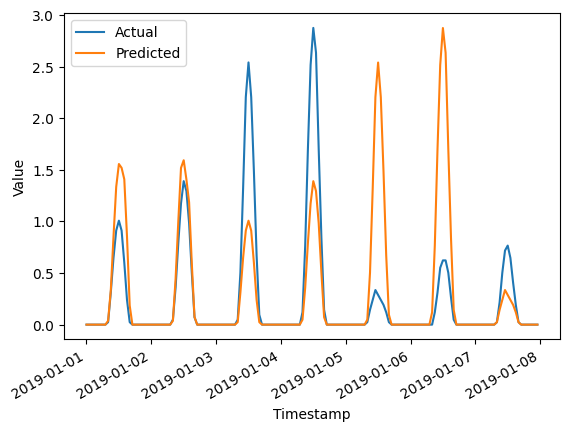

In [10]:
# result_df[['timestamp', 'E_sold_spot', 'actual_pv_production']].plot()
df = result_df
plt.plot(df['timestamp'], df['E_prod_real'], label='Actual')
plt.plot(df['timestamp'], df['E_sold_spot'], label='Predicted')
# plt.plot(df['timestamp'], df['pnl'], label='Penalty')
plt.gcf().autofmt_xdate()
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()

plt.show()